In [1]:
import nltk

In [2]:
#nltk comes with data sets
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        /Users/yahya.qteishat/nltk_data...
      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> h

Commands:
  d) Download a package or collection     u) Update out of date packages
  l) List packages & collections          h) Help
  c) View & Modify Configuration          q) Quit

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        /Users/yahya.qteishat/nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [2]:
messages = [line.rstrip() for line in open ('smsspamcollection/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
#we just used list comprehension to get the data set in

In [5]:
#print first ten messages and number them using enumerate
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [6]:
#this is a tab seroerated value file, 
import pandas as pd

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',
                      names=['label','message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# exploratort data analysis time

messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
# a large part of NLP is feature engineering.
# lets make a new column to predict how long messagesa re
messages['length'] = messages['message'].apply(len)

In [12]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

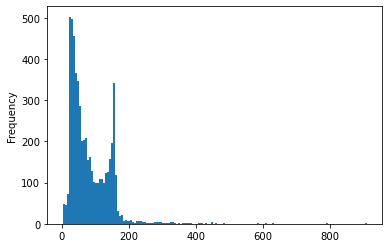

In [14]:
messages['length'].plot.hist(bins=150)
#we can see distrubtion of messages length

In [15]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
messages[messages['length']  == 910 ]['message'].iloc[0]
# use pandas masking to find the longest message sent

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x125bf1520>,
      dtype=object)

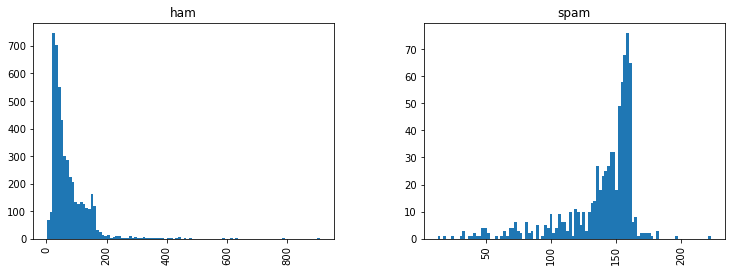

In [17]:
#make a historgram of messages using pandas built in visualization
#subplotsss
messages.hist(column='length',by='label',bins=100,figsize=(12,4))

In [18]:
#end part 1

In [19]:
#we want to convert raw messages into vectors
#lets write a function that splits messages into indiibdual words
#and return a list
#we also want to remove common words using nltk

In [20]:
import string

In [21]:
#lets remove punctation
#practice with sample mesage called mess

In [22]:
mess = 'notice: it has, pannctuaion'

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
#use list comprehension to collect punctiation in mess
nopunc = [c for c in mess if c not in string.punctuation]

In [25]:
nopunc

['n',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'a',
 'n',
 'n',
 'c',
 't',
 'u',
 'a',
 'i',
 'o',
 'n']

In [26]:
#now lets see if we can remove list of stop words like "the" and "A"
from nltk.corpus import stopwords

In [27]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
#these words are so common that when u try to do spam detection
# or any string classification, they arent helpful with ur predictions

In [29]:
nopunc = ''.join(nopunc)

In [30]:
nopunc

'notice it has pannctuaion'

In [31]:
nopunc.split()

['notice', 'it', 'has', 'pannctuaion']

In [32]:
#lets use list comprehension to remvoe stop words

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['notice', 'pannctuaion']

In [34]:
#now we have most important words that are relvant in classification

In [35]:
# "word for word in nopunc.split()" iterates through the mess
# if lowercase version of words not in stop words

In [37]:
#now lets design a function to apply to our data frame
def text_process(mess):
    '''
    1.remove punctiation
    2.remove stop words
    3.return list of clean words
    '''
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [38]:
#now apply to message column in data
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [39]:
# we removed all stop words and created list of relevant words
# there are much more robust tools for text normalizayion
#for example, stemming combines all words of different tenses
# nltk makes these very easy, we will explore later with project

#stemming wont help us here, but we need to adress the short hand

#we nede to work on vectorization, we need to convvert each token
#into a vector that scikit learn machine learning models can understand

In [40]:
# three steps for vectorization:

# TF, IDF, normalize vectors to unit length, to abstract
# from og text, known as L2 form.

In [41]:
#we will use scikit learn's "CountVectorizer" estimator object.
# this model conversts collection of text docs to matrix of token counts


In [42]:
#so we get a matrix where u have one row for every word
# and one column for every text message

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
bagofwords_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [45]:
# so we just created a very very large matrix

In [46]:
print(len(bagofwords_transformer.vocabulary_))

11425


In [47]:
mess4 = messages['message'][3]

In [48]:
print(mess4)

U dun say so early hor... U c already then say...


In [49]:
bow4 = bagofwords_transformer.transform([mess4])

In [50]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [51]:
print(bow4.shape)

(1, 11425)


In [52]:
# check which words appreared twice based off index
bagofwords_transformer.get_feature_names()[9554]

'say'

In [53]:
# end of part 2

In [54]:
#now were gonna do TF/IDF in part 3

In [55]:
#lets see how its all a sparse matrix
messages_bow = bagofwords_transformer.transform(messages['message'])

In [56]:
print('Shape of Spare matrix: ',messages_bow.shape)

Shape of Spare matrix:  (5572, 11425)


In [57]:
#check amount of non zero occurences
messages_bow.nnz

50548

In [58]:
#check sparsity with formula from lecture notes if u want

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer

In [60]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [61]:
tfidf4 = tfidf_transformer.transform(bow4)

In [62]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [63]:
# we can see the inverse doc frequency and term frequency for 
# message 4

In [64]:
# these are basically weights for each of these words
# now we can check doc frquecny of some word

In [65]:
tfidf_transformer.idf_[bagofwords_transformer.vocabulary_['university']]

8.527076498901426

In [66]:
# now lets convert all bag of words corpus into tfidf corpis
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [67]:
#lets use naive bayes algorithm

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])
# create spam detect model, pass in messages in tfidf form and ur data 

In [70]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [71]:
#so it just predicted 4th message is ham

In [72]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [73]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [74]:
# we didnt split the data here into a train test split, so lets do that

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [78]:
#scikit learn has a data pipeline capabilties to store a pipeline of our workflow
# this is what youll do in the real world

In [81]:
from sklearn.pipeline import Pipeline

In [86]:
#pass in list of everything u want to do to process ur text data
# list of touples follow this format(name of step, operation)
pipeline = Pipeline([
    
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier:train model',MultinomialNB())
])

In [87]:
#pipeline will do all preprocesing
#now treat pipeline like anormal edtimator

pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1262a7ee0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier:train model', MultinomialNB())])

In [88]:
#u just hvae to pass in the data, u dont have to manually do it this way
# now we have fitted pipeline

predictions = pipeline.predict(msg_test)

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1431
        spam       1.00      0.73      0.84       241

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



In [ ]:
'''
NLP is a huge subfield of machine learning.

we could have used other classifiers like random forest, instead
of naive bayes. youd just have to change the pipeline.

whwne working with real word text data u will use pipleine.
to do count vectorization, tfidf transformation, etc.